### importing libraries

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from PIL import Image # image resizing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
import imageio # reading images
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import warnings
warnings.filterwarnings("ignore")

2024-07-21 13:20:50.359988: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 13:20:50.360140: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 13:20:50.467302: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### let's load the data

In [2]:
data = pd.read_csv('/kaggle/input/cat-dog-images-for-classification/cat_dog.csv')

In [3]:
data.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   25000 non-null  object
 1   labels  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
data.duplicated().sum()

0

## reading an image then viewing it,

(373, 500, 3)


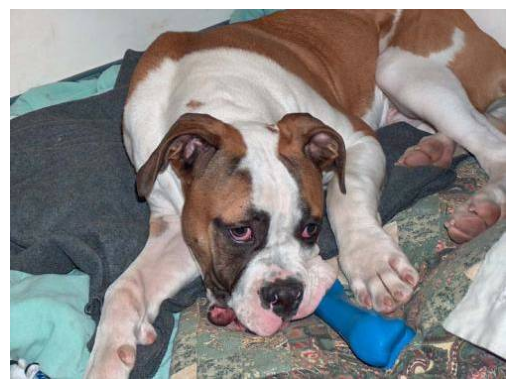

In [6]:
img = imageio.imread("/kaggle/input/cat-dog-images-for-classification/cat_dog/dog.2653.jpg")
plt.imshow(img)
print(img.shape)
plt.axis('off')
plt.show()

<Axes: xlabel='labels', ylabel='count'>

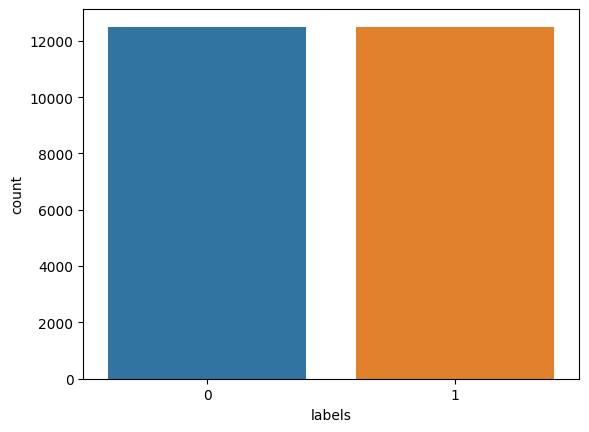

In [7]:
import seaborn as sns
sns.countplot(x=data.labels)
# the labels are balanced 

### splitting into train and test split

In [8]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=0)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

### resizing the image then creating a np array of it

In [9]:
images = []
for img_name in train_data.image:
    img_path = os.path.join("../input/cat-dog-images-for-classification/cat_dog", img_name)
    img = imageio.imread(img_path)
    # conerting it to PIL format in order to resize it,then converting it back to numpy array
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')    
    images.append(img)
X_train = np.stack(images) #  stacks the list of image arrays into a single NumPy array

In [10]:
images2 = []
for img_name in test_data.image:
    img_path = os.path.join("../input/cat-dog-images-for-classification/cat_dog", img_name)
    img = imageio.imread(img_path)
    # conerting it to PIL format in order to resize it,then converting it back to numpy array
    img = np.array(Image.fromarray(img).resize((32,32))).astype('float32')    
    images2.append(img)
X_test = np.stack(images2) #  stacks the list of image arrays into a single NumPy array

### normalizing image pixel values

In [11]:
X_train = X_train/255. 
X_test = X_test/255. 

### creating dependent variables

In [12]:
y_train = train_data['labels']
y_test = test_data['labels']

In [13]:
y_train

0        0
1        0
2        1
3        1
4        1
        ..
18745    0
18746    0
18747    1
18748    1
18749    0
Name: labels, Length: 18750, dtype: int64

### model building

In [14]:
model = Sequential([
    Conv2D(128,3,activation='relu',input_shape=(32,32,3)), # feature extractions
    MaxPooling2D(2,2), # downsampling
    Conv2D(128,3,activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(), #flattening
    Dense(1,activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
 59/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5070 - loss: 0.7022

I0000 00:00:1721568384.519970     160 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5773 - loss: 0.6697 - val_accuracy: 0.6947 - val_loss: 0.5713
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7160 - loss: 0.5538 - val_accuracy: 0.7320 - val_loss: 0.5368
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7508 - loss: 0.5076 - val_accuracy: 0.7584 - val_loss: 0.4950
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7817 - loss: 0.4714 - val_accuracy: 0.7733 - val_loss: 0.4794
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7811 - loss: 0.4612 - val_accuracy: 0.7691 - val_loss: 0.4830
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.4202 - val_accuracy: 0.7987 - val_loss: 0.4469
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8168 - loss: 0.3971 - val_accuracy: 0.7936 - val_loss: 0.4426
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8303 - loss: 0.3733 - val_accuracy: 0.7672 - val_

In [17]:
model.evaluate(X_test,y_test)

196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7850 - loss: 0.4745


[0.47316110134124756, 0.7875199913978577]

In [18]:
len(X_test)

6250

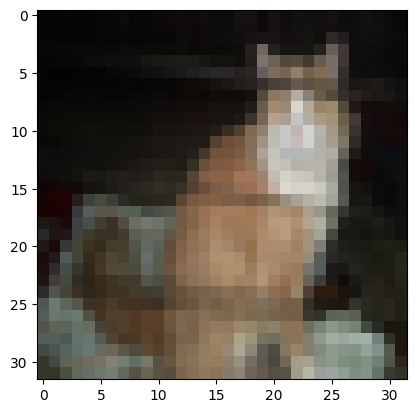

In [24]:
import random
idx = random.randint(0,len(X_test))
plt.imshow(X_test[idx])

In [25]:
model.predict(X_test[idx].reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.13052149]], dtype=float32)

In [26]:
model.save('cat_dogmodel.keras')